In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas_datareader as pdr

In [52]:
from BackTestAlgo import *
from Order import *
from DataQuery import *
from Record import *
from AlphaBeta import *
from Preprocessing import *

In [66]:
s_date = datetime.datetime(2020,9,2)
e_date = datetime.datetime(2021,6,28)

mrna = pdr.DataReader('MRNA', 'yahoo', s_date, e_date)
nvda = pdr.DataReader('NVDA', 'yahoo', s_date, e_date)
amzn = pdr.DataReader('AMZN', 'yahoo', s_date, e_date)
arvl = pdr.DataReader('ARVL', 'yahoo', s_date, e_date)
nvda

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-01,559.750000,537.460022,539.200012,552.840027,12782900.0,552.359436
2020-09-02,589.070007,556.000000,588.150024,573.859985,21850300.0,573.361206
2020-09-03,555.380005,515.150024,553.150024,520.619995,23628200.0,520.167419
2020-09-04,527.000000,468.190002,511.350006,504.899994,36592100.0,504.461121
2020-09-08,502.000000,468.170013,469.380005,476.519989,19893200.0,476.105774
2020-09-09,512.369995,489.269989,496.000000,508.600006,18405000.0,508.157898
2020-09-10,522.609985,486.679993,519.570007,492.470001,17467100.0,492.041931
2020-09-11,506.100006,475.829987,499.420013,486.579987,15923200.0,486.157013
2020-09-14,532.599976,505.250000,523.239990,514.890015,30043600.0,514.442444


In [26]:
mrna['date'] = mrna.index
mrna = mrna.reset_index(drop=True)
mrna['symbol'] = 'MRNA'
mrna = mrna[['date', 'symbol', 'Adj Close']]
mrna

,date,symbol,Adj Close
0,2020-09-01,MRNA,63.320000
1,2020-09-02,MRNA,64.720001
2,2020-09-03,MRNA,64.839996
3,2020-09-04,MRNA,62.599998
4,2020-09-08,MRNA,54.340000
...,...,...,...
202,2021-06-22,MRNA,221.360001
203,2021-06-23,MRNA,212.039993
204,2021-06-24,MRNA,220.139999
205,2021-06-25,MRNA,219.940002


In [27]:
nvda['date'] = nvda.index
nvda = nvda.reset_index(drop=True)
nvda['symbol'] = 'NVDA'
nvda = nvda[['date', 'symbol', 'Adj Close']]
nvda

,date,symbol,Adj Close
0,2020-09-01,NVDA,552.359436
1,2020-09-02,NVDA,573.361206
2,2020-09-03,NVDA,520.167419
3,2020-09-04,NVDA,504.461121
4,2020-09-08,NVDA,476.105774
...,...,...,...
202,2021-06-22,NVDA,755.469971
203,2021-06-23,NVDA,762.289978
204,2021-06-24,NVDA,768.219971
205,2021-06-25,NVDA,761.239990


In [28]:
amzn['date'] = amzn.index
amzn = amzn.reset_index(drop=True)
amzn['symbol'] = 'AMZN'
amzn = amzn[['date', 'symbol', 'Adj Close']]
amzn

,date,symbol,Adj Close
0,2020-09-01,AMZN,3499.120117
1,2020-09-02,AMZN,3531.449951
2,2020-09-03,AMZN,3368.000000
3,2020-09-04,AMZN,3294.620117
4,2020-09-08,AMZN,3149.840088
...,...,...,...
202,2021-06-22,AMZN,3505.439941
203,2021-06-23,AMZN,3503.820068
204,2021-06-24,AMZN,3449.080078
205,2021-06-25,AMZN,3401.459961


In [29]:
arvl['date'] = arvl.index
arvl = arvl.reset_index(drop=True)
arvl['symbol'] = 'ARVL'
arvl = arvl[['date', 'symbol', 'Adj Close']]
arvl

,date,symbol,Adj Close
0,2020-09-01,ARVL,9.970000
1,2020-09-02,ARVL,10.025000
2,2020-09-03,ARVL,10.010000
3,2020-09-04,ARVL,10.010000
4,2020-09-08,ARVL,10.010000
...,...,...,...
202,2021-06-22,ARVL,16.120001
203,2021-06-23,ARVL,16.570000
204,2021-06-24,ARVL,17.110001
205,2021-06-25,ARVL,16.650000


In [34]:
data = pd.concat([mrna, nvda, amzn, arvl])
data

,date,symbol,Adj Close
0,2020-09-01,MRNA,63.320000
1,2020-09-02,MRNA,64.720001
2,2020-09-03,MRNA,64.839996
3,2020-09-04,MRNA,62.599998
4,2020-09-08,MRNA,54.340000
...,...,...,...
202,2021-06-22,ARVL,16.120001
203,2021-06-23,ARVL,16.570000
204,2021-06-24,ARVL,17.110001
205,2021-06-25,ARVL,16.650000


In [38]:
start_date = datetime.datetime(2020,9,2)
end_date = datetime.datetime(2021,6,28)
benchmark = pdr.DataReader('^GSPC', 'yahoo', start_date, end_date)
benchmark['date'] = benchmark.index
benchmark = benchmark.reset_index(drop=True)
benchmark['price'] = benchmark['Adj Close']
benchmark['benchmark'] = 'SP500'
benchmark = benchmark[['date', 'benchmark', 'price']]
benchmark

,date,benchmark,price
0,2020-09-01,SP500,3526.649902
1,2020-09-02,SP500,3580.840088
2,2020-09-03,SP500,3455.060059
3,2020-09-04,SP500,3426.959961
4,2020-09-08,SP500,3331.840088
...,...,...,...
202,2021-06-22,SP500,4246.439941
203,2021-06-23,SP500,4241.839844
204,2021-06-24,SP500,4266.490234
205,2021-06-25,SP500,4280.700195


In [49]:
oder_schedule = pd.read_csv("C:/Users/ajcltm/Desktop/ordr_schedule.csv")
oder_schedule['date'] = pd.to_datetime(oder_schedule['date'], format='%Y-%m-%d')
oder_schedule = oder_schedule[['date', 'symbol', 'price', 'amounts']]
price = oder_schedule.loc[0,'price']
price

68.31

In [48]:
def my_init(context):
    context.symbols = ['MRNA', 'NVDA', 'AMZN', 'ARVL']
    # universe를 symbols로 정의(반드시 지정해야함)

    context.price = 'Adj Close'
    # price로 사용할 칼럼 인덱스 이름을 알려줘야함(open, high, close 등의 인덱스를 price로 활용 가능함)
    # 여기서 지정한 인덱스는 포트폴리오를 평가할 때 기본적으로 사용하는 지표임

    context.capital_base = 0
    # 투자원금을 설정함. 지정하지 않으면 기본값을 사용함

    context.i = 0

In [59]:
def handle_data(context, data):
    context.i += 1
    print('\n')
    print(data.current_time)

    order_schedule = pd.read_csv("C:/Users/ajcltm/Desktop/ordr_schedule.csv")
    order_schedule['date'] = pd.to_datetime(order_schedule['date'], format='%Y-%m-%d')
    order_schedule = order_schedule[['date', 'symbol', 'price', 'amounts']]

    for i in range(0, len(order_schedule)) :
        if data.current_time == order_schedule.loc[i, 'date']:
            symbol = order_schedule.loc[i, 'symbol']
            price = order_schedule.loc[i, 'price']
            amounts = order_schedule.loc[i, 'amounts']
            deposit(context, price*amounts)
            order(context, [symbol], [price], [amounts])

    mrna_price = data.current_data('MRNA', 'price')
    mrna_amounts = context.portfolio['stock']['MRNA']['amounts']
    nvda_price = data.current_data('NVDA', 'price')
    nvda_amounts = context.portfolio['stock']['NVDA']['amounts']
    amzn_price = data.current_data('AMZN', 'price')
    amzn_amounts = context.portfolio['stock']['AMZN']['amounts']
    arvl_price = data.current_data('ARVL', 'price')
    arvl_amounts = context.portfolio['stock']['ARVL']['amounts']

    # bench1_return = context.benchmark['benchmark_class'].benchmark_history(context, context.benchmark['benchmark_symbols'][0], 'return', 1).values[0]
    # bench2_return = \
    # context.benchmark['benchmark_class'].benchmark_history(context, context.benchmark['benchmark_symbols'][1], 'return',
    #                                                        1).values[0]

    # print('bench_price :{0} '.format(bench1_return))
    # record(context, bench1_return=bench1_return,bench2_return=bench2_return, nvda_price=nvda_price, nvda_amounts=nvda_amounts, mena_price=mena_price)
    record(context, mrna_price=mrna_price, mrna_amounts=mrna_amounts, nvda_price=nvda_price, nvda_amounts=nvda_amounts, amzn_price=amzn_price, amzn_amounts = amzn_amounts, arvl_price=arvl_price, arvl_amounts = arvl_amounts)

In [60]:
tester = BackTester(initialize=my_init, tradingAlgo=handle_data)

result = tester.run(data, benchmark)


Hello backtesting
context.benchmarks symbols : SP500
context.benchmark_data : 
          date benchmark        price    return
0   2020-09-01     SP500  3526.649902       NaN
1   2020-09-02     SP500  3580.840088  0.015366
2   2020-09-03     SP500  3455.060059 -0.035126
3   2020-09-04     SP500  3426.959961 -0.008133
4   2020-09-08     SP500  3331.840088 -0.027756
..         ...       ...          ...       ...
202 2021-06-22     SP500  4246.439941  0.005124
203 2021-06-23     SP500  4241.839844 -0.001083
204 2021-06-24     SP500  4266.490234  0.005811
205 2021-06-25     SP500  4280.700195  0.003331
206 2021-06-28     SP500  4280.290039 -0.000096

[207 rows x 4 columns]


2020-09-01 00:00:00
y : 
[[nan]]
y drop : 
[]
periods : 1
querydata : 
        date benchmark        price  return
0 2020-09-01     SP500  3526.649902     NaN
benchmark_history : 
0   NaN
Name: return, dtype: float64


2020-09-02 00:00:00
y : 
[[       nan]
 [0.61927234]]
y drop : 
[[0.61927234]]
periods : 2
querydat

C:\Users\ajcltm\PycharmProjects\BackTesting\BackTestAlgo.py:124: RuntimeWarning: invalid value encountered in double_scalars
  rate_of_return = (ending_portfolio_value - capital_base) / capital_base
C:\Users\ajcltm\PycharmProjects\BackTesting\BackTestAlgo.py:126: RuntimeWarning: invalid value encountered in double_scalars
  portfolio_return = (ending_portfolio_value - starting_portfolio_value) / starting_portfolio_value



y drop : 
[[ 0.61927234]
 [-0.06333958]
 [-0.03164262]
 [-0.08133329]
 [ 0.06098661]
 [-0.01831576]
 [ 0.00170997]]
periods : 8
querydata : 
        date benchmark        price    return
0 2020-09-01     SP500  3526.649902       NaN
1 2020-09-02     SP500  3580.840088  0.015366
2 2020-09-03     SP500  3455.060059 -0.035126
3 2020-09-04     SP500  3426.959961 -0.008133
4 2020-09-08     SP500  3331.840088 -0.027756
5 2020-09-09     SP500  3398.959961  0.020145
6 2020-09-10     SP500  3339.189941 -0.017585
7 2020-09-11     SP500  3340.969971  0.000533
benchmark_history : 
0         NaN
1    0.015366
2   -0.035126
3   -0.008133
4   -0.027756
5    0.020145
6   -0.017585
7    0.000533
Name: return, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]]
alpha : 
0.12524852821294602
beta_list : 
[7.409]


2020-09-14 00:00:00
y : 
[[        nan]
 [ 0.61927234]
 [-0.06333958]
 [-0.03164262]
 [-0.08133329]
 [ 0.06098661]
 [-0

y : 
[[        nan]
 [ 0.61927234]
 [-0.06333958]
 [-0.03164262]
 [-0.08133329]
 [ 0.06098661]
 [-0.01831576]
 [ 0.00170997]
 [ 0.06303297]
 [ 0.02286482]
 [-0.01424093]
 [-0.00752825]
 [-0.00395033]
 [ 0.01391627]
 [ 0.00341675]
 [-0.03433825]
 [ 0.00133064]]
y drop : 
[[ 0.61927234]
 [-0.06333958]
 [-0.03164262]
 [-0.08133329]
 [ 0.06098661]
 [-0.01831576]
 [ 0.00170997]
 [ 0.06303297]
 [ 0.02286482]
 [-0.01424093]
 [-0.00752825]
 [-0.00395033]
 [ 0.01391627]
 [ 0.00341675]
 [-0.03433825]
 [ 0.00133064]]
periods : 17
querydata : 
         date benchmark        price    return
0  2020-09-01     SP500  3526.649902       NaN
1  2020-09-02     SP500  3580.840088  0.015366
2  2020-09-03     SP500  3455.060059 -0.035126
3  2020-09-04     SP500  3426.959961 -0.008133
4  2020-09-08     SP500  3331.840088 -0.027756
5  2020-09-09     SP500  3398.959961  0.020145
6  2020-09-10     SP500  3339.189941 -0.017585
7  2020-09-11     SP500  3340.969971  0.000533
8  2020-09-14     SP500  3383.540039  0

25 2020-10-07     SP500  3419.439941  0.017397
benchmark_history : 
0          NaN
1     0.015366
2    -0.035126
3    -0.008133
4    -0.027756
5     0.020145
6    -0.017585
7     0.000533
8     0.012742
9     0.005219
10   -0.004619
11   -0.008412
12   -0.011183
13   -0.011571
14    0.010518
15   -0.023721
16    0.002987
17    0.015977
18    0.016111
19   -0.004813
20    0.008254
21    0.005293
22   -0.009578
23    0.017973
24   -0.013974
25    0.017397
Name: return, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.00461895]
 [-0.00841237]
 [-0.01118258]
 [-0.0115711 ]
 [ 0.01051795]
 [-0.02372146]
 [ 0.00298746]
 [ 0.01597672]
 [ 0.01611059]
 [-0.00481266]
 [ 0.00825372]
 [ 0.00529291]
 [-0.00957765]
 [ 0.01797271]
 [-0.01397352]
 [ 0.01739675]]
alpha : 
0.14106520095743555
beta_list : 
[12.198]


2020-10-08 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-0

 [-0.01632986]]
alpha : 
0.10469182856985752
beta_list : 
[10.787]


2020-10-20 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]]
y drop : 
[[ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [

40 2020-10-28     SP500  3271.030029 -0.035288
benchmark_history : 
0          NaN
1     0.015366
2    -0.035126
3    -0.008133
4    -0.027756
5     0.020145
6    -0.017585
7     0.000533
8     0.012742
9     0.005219
10   -0.004619
11   -0.008412
12   -0.011183
13   -0.011571
14    0.010518
15   -0.023721
16    0.002987
17    0.015977
18    0.016111
19   -0.004813
20    0.008254
21    0.005293
22   -0.009578
23    0.017973
24   -0.013974
25    0.017397
26    0.008010
27    0.008794
28    0.016416
29   -0.006307
30   -0.006623
31   -0.001528
32    0.000135
33   -0.016330
34    0.004727
35   -0.002196
36    0.005219
37    0.003446
38   -0.018590
39   -0.003026
40   -0.035288
Name: return, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.00461895]
 [-0.00841237]
 [-0.01118258]
 [-0.0115711 ]
 [ 0.01051795]
 [-0.02372146]
 [ 0.00298746]
 [ 0.01597672]
 [ 0.01611059]
 [-0.00481266

 [ 1.05807639e-02]]
y drop : 
[[ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]]
periods : 48
querydata : 
         date benchmark        price    return
0  

 [-6.54675191e-03]]
y drop : 
[[ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.64479807e-03]
 

querydata : 
         date benchmark        price    return
0  2020-09-01     SP500  3526.649902       NaN
1  2020-09-02     SP500  3580.840088  0.015366
2  2020-09-03     SP500  3455.060059 -0.035126
3  2020-09-04     SP500  3426.959961 -0.008133
4  2020-09-08     SP500  3331.840088 -0.027756
..        ...       ...          ...       ...
59 2020-11-24     SP500  3635.409912  0.016162
60 2020-11-25     SP500  3629.649902 -0.001584
61 2020-11-27     SP500  3638.350098  0.002397
62 2020-11-30     SP500  3621.629883 -0.004596
63 2020-12-01     SP500  3662.449951  0.011271

[64 rows x 4 columns]
benchmark_history : 
0          NaN
1     0.015366
2    -0.035126
3    -0.008133
4    -0.027756
        ...   
59    0.016162
60   -0.001584
61    0.002397
62   -0.004596
63    0.011271
Name: return, Length: 64, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.00461895]
 [-0.00841237]
 [-



2020-12-14 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1



2020-12-24 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1

 [-3.99431730e-02]]
y drop : 
[[ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.64479807e-03]
 



2021-01-20 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1

 [-2.96022831e-03]]
y drop : 
[[ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.64479807e-03]
 

 [-1.03383322e-02]]
periods : 111
querydata : 
          date benchmark        price    return
0   2020-09-01     SP500  3526.649902       NaN
1   2020-09-02     SP500  3580.840088  0.015366
2   2020-09-03     SP500  3455.060059 -0.035126
3   2020-09-04     SP500  3426.959961 -0.008133
4   2020-09-08     SP500  3331.840088 -0.027756
..         ...       ...          ...       ...
106 2021-02-03     SP500  3830.169922  0.001009
107 2021-02-04     SP500  3871.739990  0.010853
108 2021-02-05     SP500  3886.830078  0.003897
109 2021-02-08     SP500  3915.590088  0.007399
110 2021-02-09     SP500  3911.229980 -0.001114

[111 rows x 4 columns]
benchmark_history : 
0           NaN
1      0.015366
2     -0.035126
3     -0.008133
4     -0.027756
         ...   
106    0.001009
107    0.010853
108    0.003897
109    0.007399
110   -0.001114
Name: return, Length: 111, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0

y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.64479807e-03]
 [-1.23

 [-2.65406228e-02]]
y drop : 
[[ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.64479807e-03]
 

 [ 3.02774975e-02]]
y drop : 
[[ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.64479807e-03]
 

y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.64479807e-03]
 [-1.23

querydata : 
          date benchmark        price    return
0   2020-09-01     SP500  3526.649902       NaN
1   2020-09-02     SP500  3580.840088  0.015366
2   2020-09-03     SP500  3455.060059 -0.035126
3   2020-09-04     SP500  3426.959961 -0.008133
4   2020-09-08     SP500  3331.840088 -0.027756
..         ...       ...          ...       ...
141 2021-03-25     SP500  3909.520020  0.005240
142 2021-03-26     SP500  3974.540039  0.016631
143 2021-03-29     SP500  3971.090088 -0.000868
144 2021-03-30     SP500  3958.550049 -0.003158
145 2021-03-31     SP500  3972.889893  0.003622

[146 rows x 4 columns]
benchmark_history : 
0           NaN
1      0.015366
2     -0.035126
3     -0.008133
4     -0.027756
         ...   
141    0.005240
142    0.016631
143   -0.000868
144   -0.003158
145    0.003622
Name: return, Length: 146, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.004

[154 rows x 4 columns]
benchmark_history : 
0           NaN
1      0.015366
2     -0.035126
3     -0.008133
4     -0.027756
         ...   
149    0.001475
150    0.004221
151    0.007720
152   -0.000196
153    0.003294
Name: return, Length: 154, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.00461895]
 [-0.00841237]
 [-0.01118258]
 [-0.0115711 ]
 [ 0.01051795]
 [-0.02372146]
 [ 0.00298746]
 [ 0.01597672]
 [ 0.01611059]
 [-0.00481266]
 [ 0.00825372]
 [ 0.00529291]
 [-0.00957765]
 [ 0.01797271]
 [-0.01397352]
 [ 0.01739675]
 [ 0.00801012]
 [ 0.00879353]
 [ 0.01641581]
 [-0.00630692]
 [-0.00662314]
 [-0.00152776]
 [ 0.00013492]
 [-0.01632986]
 [ 0.00472733]
 [-0.0021957 ]
 [ 0.00521893]
 [ 0.00344576]
 [-0.01858952]
 [-0.00302562]
 [-0.03528788]
 [ 0.01194733]
 [-0.01212955]
 [ 0.0123182 ]
 [ 0.01779929]
 [ 0.02204705]
 [ 0.01946019]
 [-0.00028772]
 [ 0.01169989]
 [-0.00139979


2021-04-22 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1.

[166 rows x 4 columns]
benchmark_history : 
0           NaN
1      0.015366
2     -0.035126
3     -0.008133
4     -0.027756
         ...   
161    0.010929
162    0.001782
163   -0.000215
164   -0.000846
165    0.006763
Name: return, Length: 166, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.00461895]
 [-0.00841237]
 [-0.01118258]
 [-0.0115711 ]
 [ 0.01051795]
 [-0.02372146]
 [ 0.00298746]
 [ 0.01597672]
 [ 0.01611059]
 [-0.00481266]
 [ 0.00825372]
 [ 0.00529291]
 [-0.00957765]
 [ 0.01797271]
 [-0.01397352]
 [ 0.01739675]
 [ 0.00801012]
 [ 0.00879353]
 [ 0.01641581]
 [-0.00630692]
 [-0.00662314]
 [-0.00152776]
 [ 0.00013492]
 [-0.01632986]
 [ 0.00472733]
 [-0.0021957 ]
 [ 0.00521893]
 [ 0.00344576]
 [-0.01858952]
 [-0.00302562]
 [-0.03528788]
 [ 0.01194733]
 [-0.01212955]
 [ 0.0123182 ]
 [ 0.01779929]
 [ 0.02204705]
 [ 0.01946019]
 [-0.00028772]
 [ 0.01169989]
 [-0.00139979

[172 rows x 4 columns]
benchmark_history : 
0           NaN
1      0.015366
2     -0.035126
3     -0.008133
4     -0.027756
         ...   
167    0.002748
168   -0.006678
169    0.000703
170    0.008165
171    0.007373
Name: return, Length: 172, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.00461895]
 [-0.00841237]
 [-0.01118258]
 [-0.0115711 ]
 [ 0.01051795]
 [-0.02372146]
 [ 0.00298746]
 [ 0.01597672]
 [ 0.01611059]
 [-0.00481266]
 [ 0.00825372]
 [ 0.00529291]
 [-0.00957765]
 [ 0.01797271]
 [-0.01397352]
 [ 0.01739675]
 [ 0.00801012]
 [ 0.00879353]
 [ 0.01641581]
 [-0.00630692]
 [-0.00662314]
 [-0.00152776]
 [ 0.00013492]
 [-0.01632986]
 [ 0.00472733]
 [-0.0021957 ]
 [ 0.00521893]
 [ 0.00344576]
 [-0.01858952]
 [-0.00302562]
 [-0.03528788]
 [ 0.01194733]
 [-0.01212955]
 [ 0.0123182 ]
 [ 0.01779929]
 [ 0.02204705]
 [ 0.01946019]
 [-0.00028772]
 [ 0.01169989]
 [-0.00139979

0.014675992635014791
beta_list : 
[4.163]


2021-05-18 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]




2021-05-26 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1



2021-06-04 00:00:00
y : 
[[            nan]
 [ 6.19272338e-01]
 [-6.33395769e-02]
 [-3.16426211e-02]
 [-8.13332927e-02]
 [ 6.09866140e-02]
 [-1.83157630e-02]
 [ 1.70996510e-03]
 [ 6.30329655e-02]
 [ 2.28648198e-02]
 [-1.42409340e-02]
 [-7.52825210e-03]
 [-3.95032822e-03]
 [ 1.39162727e-02]
 [ 3.41675109e-03]
 [-3.43382456e-02]
 [ 1.33064158e-03]
 [-1.33561562e-01]
 [ 1.31676151e-02]
 [ 1.14243618e-02]
 [ 1.88756508e-02]
 [ 2.80990047e-03]
 [-3.58257835e-02]
 [ 2.77113045e+00]
 [-2.10996620e-02]
 [ 2.68603542e-02]
 [-3.14840786e-03]
 [ 2.02958192e-02]
 [ 4.36665059e-02]
 [ 1.78377538e-03]
 [-2.01746580e-02]
 [-7.97491589e-03]
 [-1.77770498e-02]
 [-2.13365447e-02]
 [ 5.03832005e-03]
 [-1.06962052e-02]
 [-3.79056558e-03]
 [ 1.04203789e-02]
 [-7.63327694e-03]
 [ 2.28682190e-02]
 [-4.63426228e-02]
 [ 2.31091932e-02]
 [-4.79822490e-02]
 [-4.81494067e-03]
 [ 2.20554901e-02]
 [ 6.03366922e-02]
 [ 2.55831739e-02]
 [ 1.05807639e-02]
 [-5.34191261e-02]
 [-4.64124292e-02]
 [ 4.22502186e-02]
 [-1

[196 rows x 4 columns]
benchmark_history : 
0           NaN
1      0.015366
2     -0.035126
3     -0.008133
4     -0.027756
         ...   
191   -0.000797
192    0.000175
193   -0.001824
194    0.004652
195    0.001948
Name: return, Length: 196, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0.01274183]
 [ 0.00521936]
 [-0.00461895]
 [-0.00841237]
 [-0.01118258]
 [-0.0115711 ]
 [ 0.01051795]
 [-0.02372146]
 [ 0.00298746]
 [ 0.01597672]
 [ 0.01611059]
 [-0.00481266]
 [ 0.00825372]
 [ 0.00529291]
 [-0.00957765]
 [ 0.01797271]
 [-0.01397352]
 [ 0.01739675]
 [ 0.00801012]
 [ 0.00879353]
 [ 0.01641581]
 [-0.00630692]
 [-0.00662314]
 [-0.00152776]
 [ 0.00013492]
 [-0.01632986]
 [ 0.00472733]
 [-0.0021957 ]
 [ 0.00521893]
 [ 0.00344576]
 [-0.01858952]
 [-0.00302562]
 [-0.03528788]
 [ 0.01194733]
 [-0.01212955]
 [ 0.0123182 ]
 [ 0.01779929]
 [ 0.02204705]
 [ 0.01946019]
 [-0.00028772]
 [ 0.01169989]
 [-0.00139979

 [-8.83050492e-03]]
periods : 202
querydata : 
          date benchmark        price    return
0   2020-09-01     SP500  3526.649902       NaN
1   2020-09-02     SP500  3580.840088  0.015366
2   2020-09-03     SP500  3455.060059 -0.035126
3   2020-09-04     SP500  3426.959961 -0.008133
4   2020-09-08     SP500  3331.840088 -0.027756
..         ...       ...          ...       ...
197 2021-06-15     SP500  4246.589844 -0.002012
198 2021-06-16     SP500  4223.700195 -0.005390
199 2021-06-17     SP500  4221.859863 -0.000436
200 2021-06-18     SP500  4166.450195 -0.013124
201 2021-06-21     SP500  4224.790039  0.014002

[202 rows x 4 columns]
benchmark_history : 
0           NaN
1      0.015366
2     -0.035126
3     -0.008133
4     -0.027756
         ...   
197   -0.002012
198   -0.005390
199   -0.000436
200   -0.013124
201    0.014002
Name: return, Length: 202, dtype: float64
x : 
[[ 0.01536591]
 [-0.03512584]
 [-0.00813303]
 [-0.02775634]
 [ 0.02014499]
 [-0.0175848 ]
 [ 0.00053307]
 [ 0

In [63]:
pd.set_option('display.max.columns', 50)
pd.set_option('display.max_rows', 1000)

result

,date,total_profit,rate_of_return,starting_cash,ending_cash,starting_stock_value,ending_stock_value,starting_portfolio_value,ending_portfolio_value,portfolio_return,capital_base,alpha,beta_SP500,mrna_price,mrna_amounts,nvda_price,nvda_amounts,amzn_price,amzn_amounts,arvl_price,arvl_amounts
0,2020-09-01,0.000000,NaN,0,0,0,0.000000,0,0.000000,NaN,0,NaN,NaN,63.320000,0,552.359436,0,3499.120117,0,9.970000,0
1,2020-09-02,363.322422,0.279230,1027.92,0,0.0,1664.482422,1027.92,1664.482422,0.619272,1301.16,0.619272,0.000,64.720001,8,573.361206,2,3531.449951,0,10.025000,0
2,2020-09-03,257.894810,0.198204,0,0,1664.482422,1559.054810,1664.482422,1559.054810,-0.063340,1301.16,0.411536,13.519,64.839996,8,520.167419,2,3368.000000,0,10.010000,0
3,2020-09-04,208.562229,0.160289,0,0,1559.05481,1509.722229,1559.05481,1509.722229,-0.031643,1301.16,0.297635,13.215,62.599998,8,504.461121,2,3294.620117,0,10.010000,0
4,2020-09-08,85.771549,0.065919,0,0,1509.722229,1386.931549,1509.722229,1386.931549,-0.081333,1301.16,0.296123,13.325,54.340000,8,476.105774,2,3149.840088,0,10.010000,0
5,2020-09-09,170.355808,0.130926,0,0,1386.931549,1471.515808,1386.931549,1471.515808,0.060987,1301.16,0.155808,7.748,56.900002,8,508.157898,2,3268.610107,0,10.010000,0
6,2020-09-10,143.403873,0.110212,0,0,1471.515808,1444.563873,1471.515808,1444.563873,-0.018316,1301.16,0.150644,7.878,57.560001,8,492.041931,2,3175.110107,0,10.050000,0
7,2020-09-11,145.874027,0.112111,0,0,1444.563873,1447.034027,1444.563873,1447.034027,0.001710,1301.16,0.125249,7.409,59.340000,8,486.157013,2,3116.219971,0,10.073000,0
8,2020-09-14,237.084873,0.182210,0,0,1447.034027,1538.244873,1447.034027,1538.244873,0.063033,1301.16,0.101045,6.480,63.669998,8,514.442444,2,3102.969971,0,10.010000,0
9,2020-09-15,272.256565,0.209241,0,0,1538.244873,1573.416565,1538.244873,1573.416565,0.022865,1301.16,0.087333,6.150,66.879997,8,519.188293,2,3156.129883,0,10.000000,0


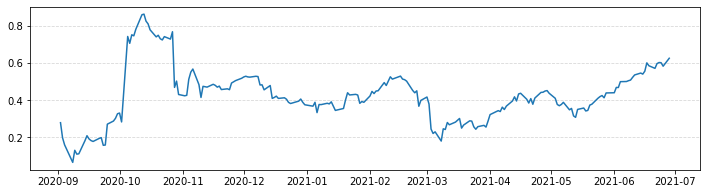

In [64]:
date = result['date']
plt.figure(figsize=(12,3))
plt.plot(date, result['rate_of_return'])
plt.grid(axis='y', linestyle='--', alpha=.5)